# Python tutorial

For HU PBL Workshop 2020

Zach Moon

<https://personal.psu.edu/zlm1/>

See slides here: <https://github.com/zmoon92/hu-pbl-workshop-2020/tree/master/python-tutorial>

So as not to clutter the name space, most functionality in Python is not available until it is `import`ed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook
plt.rcParams["figure.autolayout"] = True

Although the Python Standard Library can do many things, for most science tasks we use third-party libraries to:
* provide new functionalities
* streamline workflows
* ...


<div style="display: inline-block; padding-right: 1em">
<img alt="PyData" src="https://pydata.org/wp-content/uploads/2019/06/pydata-logo-final.png" width=280> 
</div>

<div style="display: inline-block; padding-right: 1em">
<img alt="NumPy" src="https://numpy.org/images/logos/numpy.svg" width=120>&nbsp;NumPy
</div>
    
<div style="display: inline-block; padding-right: 1em">
<img alt="Pandas" src="https://pandas.pydata.org/docs/_static/pandas.svg" width=220>
</div>


<div style="display: inline-block; padding-right: 1em">
<img alt="xarray" src="http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png" width=250>
</div>

<div style="display: inline-block; padding-right: 1em">
<img alt="scikit-learn" src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" width=220>
</div>


## Demonstration

### Basics

In [3]:
print("Hello, world!")

Hello, world!


In [4]:
1 + 1

2

In [5]:
1 + 2**3

9

### Array math with NumPy

Lets us write code for math operations without looping.

<IPython.core.display.Javascript object>


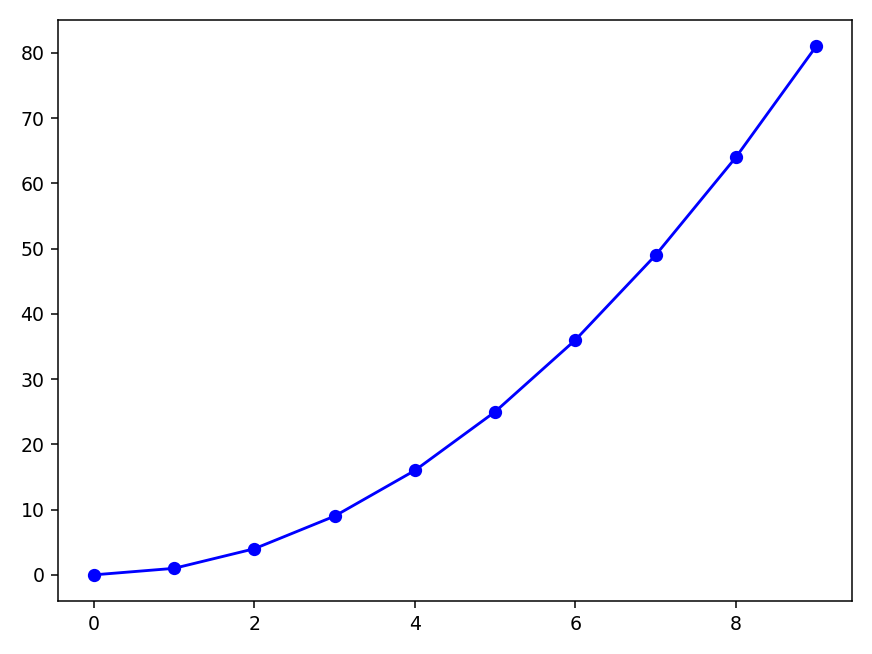

In [6]:
x = np.arange(10)
y = x**2
plt.figure(); plt.plot(x, y, "bo-");

Pandas gives us labelled arrays of data, allowing for automatically labelled plots.

<IPython.core.display.Javascript object>


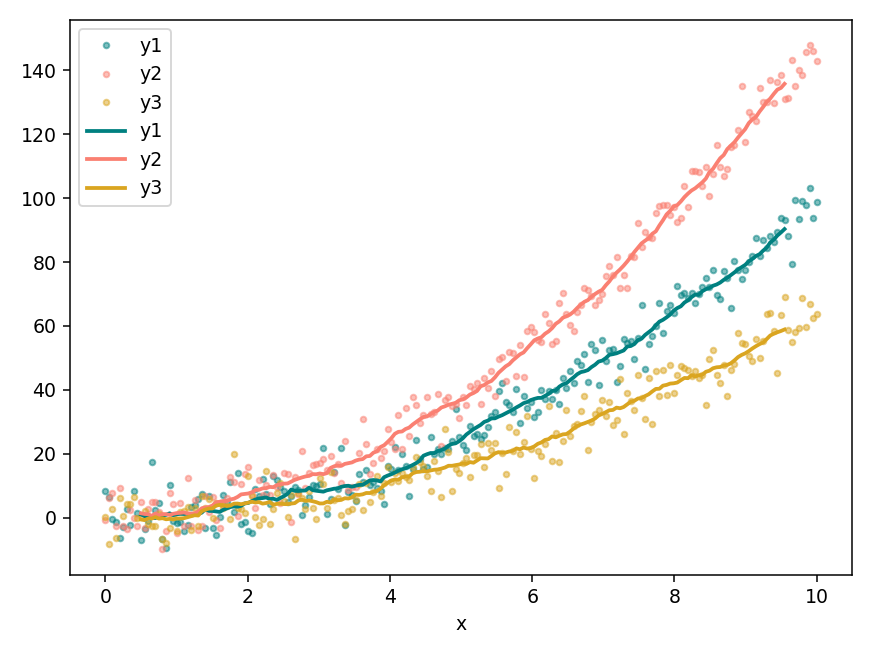

In [7]:
import pandas as pd

x = np.linspace(0, 10, 200)
y = x**2
y1 = y + 5*np.random.randn(y.size)
y2 = 1.5*y + 5*np.random.randn(y.size)
y3 = 0.65*y + 5*np.random.randn(y.size)

df = pd.DataFrame({"x": x, "y1": y1, "y2": y2, "y3": y3})
df.set_index("x", inplace=True)

colors = ["teal", "salmon", "goldenrod"]
ax = df.plot(style=".", alpha=0.5, color=colors)
df.rolling(20, center=True).mean().plot(ax=ax, lw=2, color=colors);

And, provides many helpful routines.

In [8]:
df.describe()

,y1,y2,y3
count,200.000000,200.000000,200.000000
mean,33.317193,50.493645,21.868178
std,30.418054,45.076890,20.060820
min,-9.406666,-9.973719,-8.360789
25%,7.513901,11.182807,4.637429
50%,24.960481,37.784130,17.108841
75%,55.663715,85.396138,37.623261
max,103.273504,147.879730,68.927242


hvPlot lets us plot the same data using HoloViews with the Bokeh JS backend.

In [9]:
import hvplot.pandas

df.hvplot()

:NdOverlay   [Variable]
   :Curve   [x]   (value)

### Interactive plots -- HoloViews

Some HoloViews plots, once created, can run in the browser without Python (JavaScript only).


In [10]:
import holoviews as hv

#hv.extension("matplotlib")

### Interactive plots -- Matplotlib + ipywidgets

Python must be running.

<IPython.core.display.Javascript object>


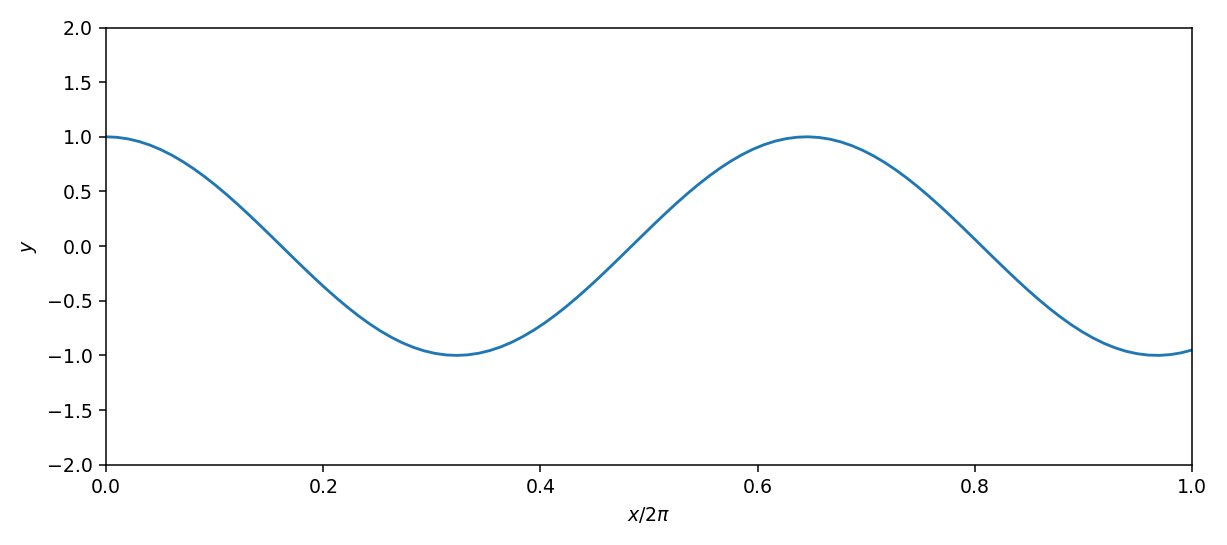

interactive(children=(FloatSlider(value=1.0, description='A', max=2.0, min=1.0), FloatSlider(value=1.55, descr…

In [11]:
from ipywidgets import interact

fig, ax = plt.subplots(figsize=(9, 4))
t = np.linspace(0, 2*np.pi, 100)
def sine_wave(A, omega, phi):
    ax.clear()
    ax.plot(t/(2*np.pi), A * np.sin(omega*t + phi))
    ax.set_xlabel("$x / 2\pi$"); ax.set_ylabel("$y$")
    ax.set_ylim((-2, 2))
    ax.set_xlim((t.min(), t.max()/(2*np.pi)))

interact(sine_wave, A=(1, 2, 0.1), omega=(0.1, 3.0, 0.01), phi=(0, np.pi, 0.01));

### Real data

![Unidata Siphon](https://unidata.github.io/siphon/latest/_static/siphon_150x150.png) (Unidata)

Get current data (most recend sounding).

In [12]:
import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

now = datetime.datetime.now()
hour = (now.hour // 12)*12  # round down
date = datetime.datetime(now.year, now.month, now.day, hour)
station = "IAD"  # Sterling, VA

df = WyomingUpperAir.request_data(date, station)
df

,pressure,height,temperature,dewpoint,direction,speed,u_wind,v_wind,station,station_number,time,latitude,longitude,elevation
0,1005.0,93,23.0,21.1,0.0,0.0,-0.000000,-0.000000e+00,IAD,72403,2020-07-09 12:00:00,38.98,-77.46,93.0
1,1004.0,100,24.0,20.7,31.0,0.0,-0.000000,-0.000000e+00,IAD,72403,2020-07-09 12:00:00,38.98,-77.46,93.0
2,1000.0,129,22.8,20.7,155.0,1.0,-0.422618,9.063078e-01,IAD,72403,2020-07-09 12:00:00,38.98,-77.46,93.0
3,980.1,305,22.3,20.6,155.0,4.0,-1.690473,3.625231e+00,IAD,72403,2020-07-09 12:00:00,38.98,-77.46,93.0
4,967.0,422,22.0,20.5,147.0,4.0,-2.178556,3.354682e+00,IAD,72403,2020-07-09 12:00:00,38.98,-77.46,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,11.2,30785,-38.6,-80.0,85.0,36.0,-35.863009,-3.137607e+00,IAD,72403,2020-07-09 12:00:00,38.98,-77.46,93.0
133,10.0,31570,-40.7,-79.7,105.0,40.0,-38.637033,1.035276e+01,IAD,72403,2020-07-09 12:00:00,38.98,-77.46,93.0
134,8.6,32614,-38.3,-78.9,110.0,42.0,-39.467090,1.436485e+01,IAD,72403,2020-07-09 12:00:00,38.98,-77.46,93.0
135,7.9,33223,-36.8,-78.5,90.0,39.0,-39.000000,-2.388061e-15,IAD,72403,2020-07-09 12:00:00,38.98,-77.46,93.0


log-P plot

<IPython.core.display.Javascript object>


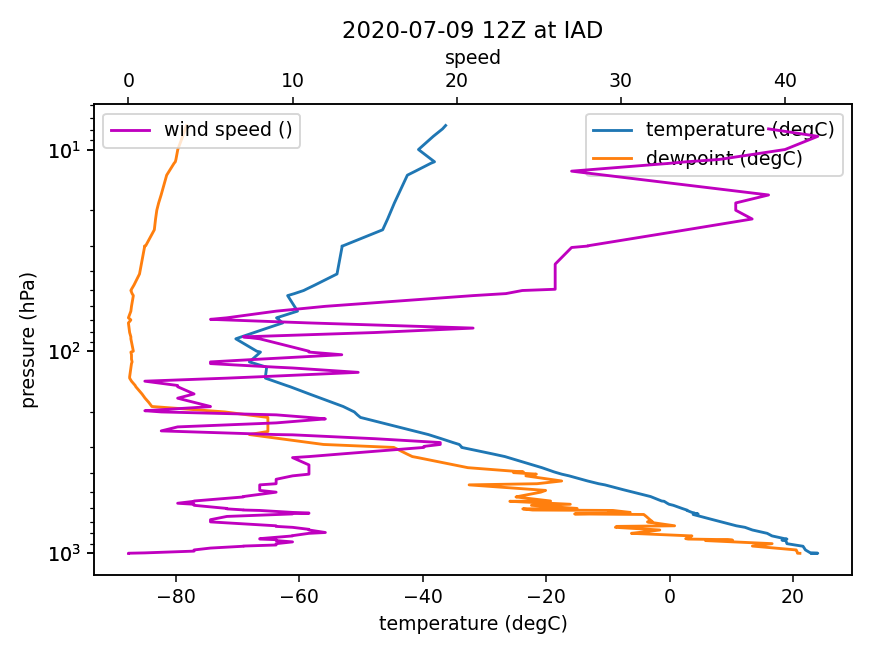

Text(0.5, 0, 'temperature (degC)')

In [13]:
_, ax = plt.subplots()
for varname in ["temperature", "dewpoint"]:
    label = f"{varname} ({df.units[varname]})"
    df.plot(y="pressure", x=varname, logy=True, ax=ax, label=label).invert_yaxis()

ax2 = ax.twiny()
df.plot(y="pressure", x="speed", logy=True, ax=ax2, label="wind speed ()", c="m").invert_yaxis()

ax.set_title(f"{date.strftime('%Y-%m-%d %HZ')} at {station}")
ax.set_ylabel("pressure (hPa)")
ax.set_xlabel("temperature (degC)")

Thanks!

Now for tutorial...

**References**

Sounding:
* <https://unidata.github.io/siphon/latest/examples/upperair/Wyoming_Request.html>
* <https://unidata.github.io/python-gallery/examples/Sounding_Plotter.html>